## Final Project Submission

Please fill out:
* Student name: Namita Rana
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Overview:
Exploratory Data Analysis:

Business Problem:

Goals and approach:

Let's import the required libraries:

In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Collecting data:
For this EDA we are using data from the following datasets:
1.bom movie_gross data:
2.tmdb
3.tn movie_budgets
4.Highest Grossing Movie for each Genre:
    This data has been collected from The-numbers.com.
    This data gives the highest-grossing movie for each Genre.



    

Importing all the dataset we will be using for this project:
Box office Mojo:
    This dataframe could be useful in determining which movie generated the highest gross earnings and for which year.
    It can also help us in understanding which studio is producing the movie's with highest gross earnings.
Imdb data:
    For this I will be using imdb.title.basic.csv
Tmdb data: This data can provide us with great insight about which language is the most preferred one by audiences.       And which language movie has the most voter_count.
Tn moviebudget: This data contains data about the movie,its release date,producition budget,domestic gross an          worldwide gross revenues. Which release date has the highest worldwide gross revenue. What should be our average production budget for the movie.
    



In [443]:
#Import all data files
bom_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
tmdb_data = pd.read_csv('zippedData/tmdb.movies.csv.gz')




In [444]:
#bom_movie information
bom_movie_gross.info()
bom_movie_gross.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [445]:
#imdb_basics information
imdb_title_basics.info()
imdb_title_basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [446]:
#tmdb data information
tmdb_data.info()
tmdb_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Data Preparation:
My goal for this step is to merge the datasets into a final datset which I will be using for analysis of the the factors that can help Microsoft in taking the business decision of how to invest in this field

1.#We will start with the cleaning the first dataset bom_movie_gross and get it ready to merge:

In [447]:
# Convert domestic gross value data type to int
#bom_movie_gross['domestic_gross'] = bom_movie_gross['domestic_gross'].fillna(0)
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].str.replace(',','')
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].astype('float64')

In [448]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [449]:
#Replacing the null values in foreign gross with 0:
#as it may have not been released worlwide
bom_movie_gross['foreign_gross'].fillna(0, inplace=True)
bom_movie_gross['domestic_gross'].fillna(0,inplace=True)

In [450]:
display(bom_movie_gross.info())
bom_movie_gross

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


None

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018
3384,El Pacto,Sony,2500.0,0.0,2018
3385,The Swan,Synergetic,2400.0,0.0,2018


2.#preparing the imdb dataset:

In [451]:
#We will separate the genres column into discrete columns:
imdb_title_basics[['genre_1','genre_2','genre_3']] = imdb_title_basics['genres'].str.split(',',n = -1,expand= True)
imdb_title_basics.head(20)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,Comedy,None,None
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",Horror,Thriller,None
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",Documentary,History,None
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,Biography,None,None


In [452]:
#Drop the genres and tconst column:

imdb_title_basics.isna().sum()
imdb_title_basics.rename(columns={'primary_title': 'title'}, inplace=True)
imdb_title_basics

,tconst,title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",Biography,Drama,None
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,Drama,None,None
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,Drama,None,None
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,Documentary,None,None
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,Comedy,None,None
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN,NaN


Feature engineering:
Merge the two:
    

In [453]:
#Merged data set of bom_movie_gross & imdb_title_basics
imdb_bom_dataset = pd.merge(imdb_title_basics, bom_movie_gross, on='title', how='inner')
imdb_bom_dataset

,tconst,title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",Action,Crime,Drama,Relbig.,1100000.0,0.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",Adventure,Drama,Romance,IFC,744000.0,8000000.0,2012
2,tt2404548,On the Road,On the Road,2011,90.0,Drama,Drama,None,None,IFC,744000.0,8000000.0,2012
3,tt3872966,On the Road,On the Road,2013,87.0,Documentary,Documentary,None,None,IFC,744000.0,8000000.0,2012
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,Drama,None,None,IFC,744000.0,8000000.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,Romance,None,None,WGUSA,747000.0,82100000.0,2018
3362,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,Drama,None,None,Eros,72000.0,0.0,2018
3363,tt8851262,Spring Fever,Spring Fever,2019,NaN,"Comedy,Horror",Comedy,Horror,None,Strand,10800.0,150000.0,2010
3364,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",Drama,Romance,None,CL,181000.0,0.0,2018


3.Preparing tmdb dataset
#Dropping the genre_ids and orginial column as it doesn't add any value to the data:



In [454]:
#Dropping the genre_ids:
tmdb_data.drop(columns =['genre_ids','id'], axis = 1,inplace = True)
tmdb_data

,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,26512,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Preparing the final dataset:
    Merging the imdb_bom_dataset with tmdb_data

In [455]:
#Our final dataset
final_movie_dataset = pd.merge( tmdb_data,imdb_bom_dataset)
final_movie_dataset

,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count,tconst,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year
0,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,2010,98.0,"Action,Adventure,Animation",Action,Adventure,Animation,P/DW,217600000.0,277300000.0,2010
1,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,2010,124.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Par.,312400000.0,311500000.0,2010
2,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,2010,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,WB,292600000.0,535700000.0,2010
3,7,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,tt0435761,2010,103.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,BV,415000000.0,652000000.0,2010
4,8,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,tt1323594,2010,95.0,"Animation,Comedy,Family",Animation,Comedy,Family,Uni.,251500000.0,291600000.0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,24778,sv,Unga Astrid,4.734,2018-11-23,Becoming Astrid,7.4,28,tt6433456,2018,123.0,"Biography,Drama",Biography,Drama,None,MBox,120000.0,0.0,2018
3194,24916,it,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,tt7186092,2017,93.0,"Biography,Drama,Music",Biography,Drama,Music,Magn.,73300.0,0.0,2018
3195,25037,en,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,tt7364566,2017,119.0,"Biography,Documentary,Music",Biography,Documentary,Music,SPC,1300000.0,0.0,2018
3196,25148,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,tt3576728,2015,105.0,"Action,Adventure,Animation",Action,Adventure,Animation,VE,491000.0,1700000.0,2018


In [456]:
final_movie_dataset[['year','Month','Date']] = final_movie_dataset['release_date'].str.split('-',n = -1,expand= True)
final_movie_dataset.isna().sum()

Unnamed: 0              0
original_language       0
original_title          0
popularity              0
release_date            0
title                   0
vote_average            0
vote_count              0
tconst                  0
start_year              0
runtime_minutes       188
genres                 46
genre_1                46
genre_2               822
genre_3              1600
studio                  0
domestic_gross          0
foreign_gross           0
year                    0
Month                   0
Date                    0
dtype: int64

In [457]:
#Dropping columns: 'tconst', start_year
final_movie_dataset.drop(['tconst','start_year'],axis = 1,inplace = True)

In [458]:
#COnverting month value to respective month name:
import calendar
final_movie_dataset['Month'] = final_movie_dataset['Month'].astype(int)
final_movie_dataset['Month'] = final_movie_dataset['Month'].apply(lambda x: calendar.month_abbr[x])
final_movie_dataset


,Unnamed: 0,original_language,original_title,popularity,release_date,title,vote_average,vote_count,runtime_minutes,genres,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year,Month,Date
0,1,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,98.0,"Action,Adventure,Animation",Action,Adventure,Animation,P/DW,217600000.0,277300000.0,2010,Mar,26
1,2,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,124.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,Par.,312400000.0,311500000.0,2010,May,07
2,4,en,Inception,27.920,2010-07-16,Inception,8.3,22186,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,WB,292600000.0,535700000.0,2010,Jul,16
3,7,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,103.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,BV,415000000.0,652000000.0,2010,Jun,17
4,8,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,95.0,"Animation,Comedy,Family",Animation,Comedy,Family,Uni.,251500000.0,291600000.0,2010,Jul,09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,24778,sv,Unga Astrid,4.734,2018-11-23,Becoming Astrid,7.4,28,123.0,"Biography,Drama",Biography,Drama,None,MBox,120000.0,0.0,2018,Nov,23
3194,24916,it,"Nico, 1988",3.789,2018-07-04,"Nico, 1988",7.3,40,93.0,"Biography,Drama,Music",Biography,Drama,Music,Magn.,73300.0,0.0,2018,Jul,04
3195,25037,en,Maria by Callas,3.184,2018-11-02,Maria by Callas,7.6,11,119.0,"Biography,Documentary,Music",Biography,Documentary,Music,SPC,1300000.0,0.0,2018,Nov,02
3196,25148,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,105.0,"Action,Adventure,Animation",Action,Adventure,Animation,VE,491000.0,1700000.0,2018,Feb,02


In [459]:
#for our final dataset I will calculate the total worldwide gross
final_movie_dataset['worldwide_gross'] = final_movie_dataset['domestic_gross'] + final_movie_dataset['foreign_gross']
final_movie_dataset['Average_gross'] = final_movie_dataset['worldwide_gross']/2
final_movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3198 entries, 0 to 3197
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3198 non-null   int64  
 1   original_language  3198 non-null   object 
 2   original_title     3198 non-null   object 
 3   popularity         3198 non-null   float64
 4   release_date       3198 non-null   object 
 5   title              3198 non-null   object 
 6   vote_average       3198 non-null   float64
 7   vote_count         3198 non-null   int64  
 8   runtime_minutes    3010 non-null   float64
 9   genres             3152 non-null   object 
 10  genre_1            3152 non-null   object 
 11  genre_2            2376 non-null   object 
 12  genre_3            1598 non-null   object 
 13  studio             3198 non-null   object 
 14  domestic_gross     3198 non-null   float64
 15  foreign_gross      3198 non-null   float64
 16  year               3198 

Analysis of the final dataset:
Our primary interest lies in determining the metrics needed for making a successful production business.
Metrics we will focus on:
2. Which genre gathers the most popularity with worldwide gross./bar chart
3. Relationship between runtime of movies and their vote_count/Scatter plot
4. Which release date seems to gather the highest worldwide & domestic gross./
5. Which studio produces the movies with highest domestic gross/Histogram
6. Whic genre has become pouplar in the last 10 years./Box plot
7. What is the average total gross by genre
8. Which language movie is the most preferred by audiences with highest worldwide_gross./ Pie-chart
 

#Visualizing the data

In [460]:
#Which movie and the genre gathered the most worldwide gross with highest worldiwde gross:
final_movie_dataset.groupby(['title','genres'])['worldwide_gross'].max()
final_movie_dataset.loc[final_movie_dataset['worldwide_gross'].idxmax()]

Unnamed: 0                             14169
original_language                         en
original_title       Avengers: Age of Ultron
popularity                            44.383
release_date                      2015-05-01
title                Avengers: Age of Ultron
vote_average                             7.3
vote_count                             13457
runtime_minutes                          141
genres               Action,Adventure,Sci-Fi
genre_1                               Action
genre_2                            Adventure
genre_3                               Sci-Fi
studio                                    BV
domestic_gross                      4.59e+08
foreign_gross                      9.464e+08
year                                    2015
Month                                    May
Date                                      01
worldwide_gross                   1.4054e+09
Average_gross                      7.027e+08
Name: 2010, dtype: object

Movie that gathered the highest worldwide gross: Age of Ultron
Genre: Action,Adventure,Sci-Fi
Worldwide_gross: 4.59e+08

In [461]:
#Get a list of all the genres:
#By splitting each genre using ',' as the delimiter and stacking the rows ontop of each other.
final_movie_dataset2 = final_movie_dataset.set_index('title').genres.str.split(',', expand=True).stack().reset_index('title')
final_movie_dataset2.columns = ['title', 'genres']
final_movie_dataset2.head()

,title,genres
0,How to Train Your Dragon,Action
1,How to Train Your Dragon,Adventure
2,How to Train Your Dragon,Animation
0,Iron Man 2,Action
1,Iron Man 2,Adventure


#Merging the 2 dataframes:
final_movie_dataset1 & final_movie_dataset2

In [462]:
Genre_popularity = pd.merge( final_movie_dataset1,final_movie_dataset2)
Genre_popularity

,title,worldwide_gross,genres
0,How to Train Your Dragon,494900000.0,Action
1,How to Train Your Dragon,494900000.0,Adventure
2,How to Train Your Dragon,494900000.0,Animation
3,Iron Man 2,623900000.0,Action
4,Iron Man 2,623900000.0,Adventure
...,...,...,...
29506,Bilal: A New Breed of Hero,2191000.0,Action
29507,Bilal: A New Breed of Hero,2191000.0,Adventure
29508,Bilal: A New Breed of Hero,2191000.0,Animation
29509,La Boda de Valentina,2800000.0,Comedy


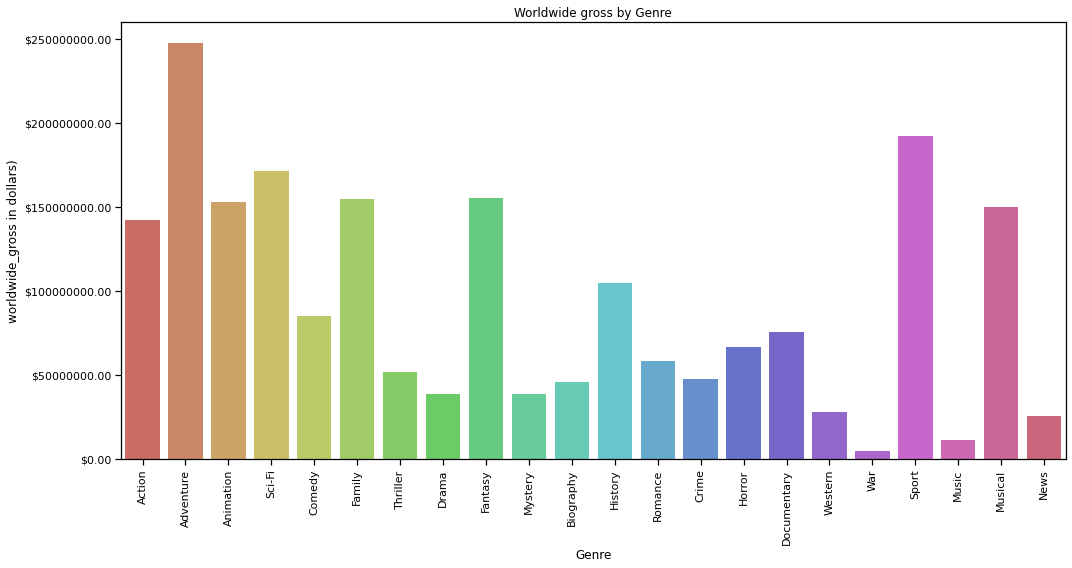

In [463]:
#Create a bar plot to show which Genre is creating the highest worldwide gross
Genre_popularity_fig, Genre_popularity_ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.barplot(ax= Genre_popularity_ax, x='genres', y='worldwide_gross', data=Genre_popularity,ci = None,palette='hls')
Genre_popularity_ax.set_xlabel('Genre')
Genre_popularity_ax.set_ylabel('worldwide_gross in dollars)')
Genre_popularity_ax.set_title('Worldwide gross by Genre')
Genre_popularity_ax.yaxis.set_major_formatter('${x:1.2f}')
Genre_popularity_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/Genre_popularity_fig.png', dpi=200)

plt.show()

Analysis2:
Which genre has become popular in the last 10 years

In [464]:
#creating a new dataframe for year
year_df = final_movie_dataset[['year','title']]
year_df

,year,title
0,2010,How to Train Your Dragon
1,2010,Iron Man 2
2,2010,Inception
3,2010,Toy Story 3
4,2010,Despicable Me
...,...,...
3193,2018,Becoming Astrid
3194,2018,"Nico, 1988"
3195,2018,Maria by Callas
3196,2018,Bilal: A New Breed of Hero


In [465]:
#Merging the two:
popular_genre = pd.merge(Genre_popularity,year_df,)
popular_genre

,title,worldwide_gross,genres,year
0,How to Train Your Dragon,494900000.0,Action,2010
1,How to Train Your Dragon,494900000.0,Adventure,2010
2,How to Train Your Dragon,494900000.0,Animation,2010
3,Iron Man 2,623900000.0,Action,2010
4,Iron Man 2,623900000.0,Adventure,2010
...,...,...,...,...
644674,Bilal: A New Breed of Hero,2191000.0,Action,2018
644675,Bilal: A New Breed of Hero,2191000.0,Adventure,2018
644676,Bilal: A New Breed of Hero,2191000.0,Animation,2018
644677,La Boda de Valentina,2800000.0,Comedy,2018


#which language is the most preferred one by audiences worldwide:

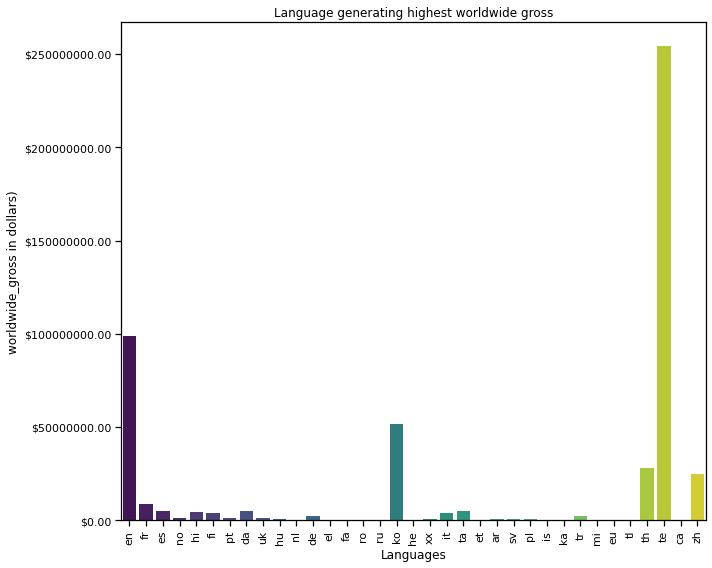

In [466]:
Language_preferred_fig, final_movie_dataset_ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.barplot(ax= final_movie_dataset_ax, x='original_language', y='worldwide_gross', data= final_movie_dataset,ci = None,palette='viridis')
final_movie_dataset_ax.set_xlabel('Languages')
final_movie_dataset_ax.set_ylabel('worldwide_gross in dollars)')
final_movie_dataset_ax.set_title('Language generating highest worldwide gross')
final_movie_dataset_ax.yaxis.set_major_formatter('${x:1.2f}')
final_movie_dataset_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/final_movie_dataset.png', dpi=200)

plt.show()

#We will find out the relationship between runtime of movies and their popularity:
There is a positive correlation between movie and it's popularity count .
However,the correlation seems to diminish as the runtime increases.

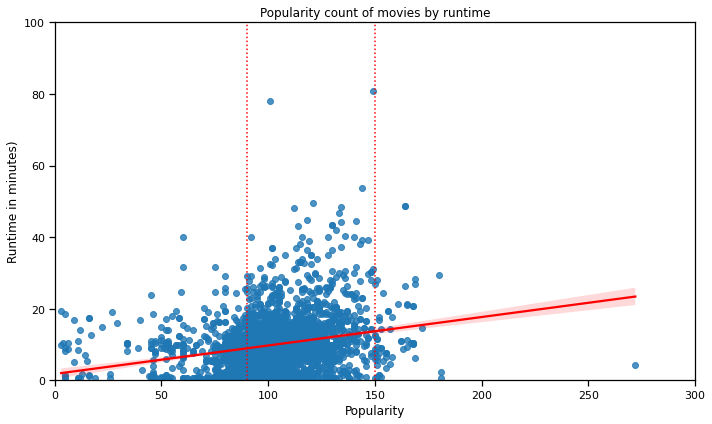

In [467]:
# Create plot
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(ax=ax, x='runtime_minutes', y='popularity', data=final_movie_dataset, line_kws={'color': 'red'})
ax.set_xlabel('Popularity')
ax.set_ylabel('Runtime in minutes)')
ax.set_title('Popularity count of movies by runtime')
ax.set(xlim=(0,300))
ax.set(ylim=(0,100))
ax.axvline(90, color='red', ls=':')
ax.axvline(150, ls=':', color ='red')
plt.tight_layout()

plt.savefig('Images/Popularity count of movies by runtime.png', dpi=150)

plt.show()

which year has been a profitable one for the movie industry.

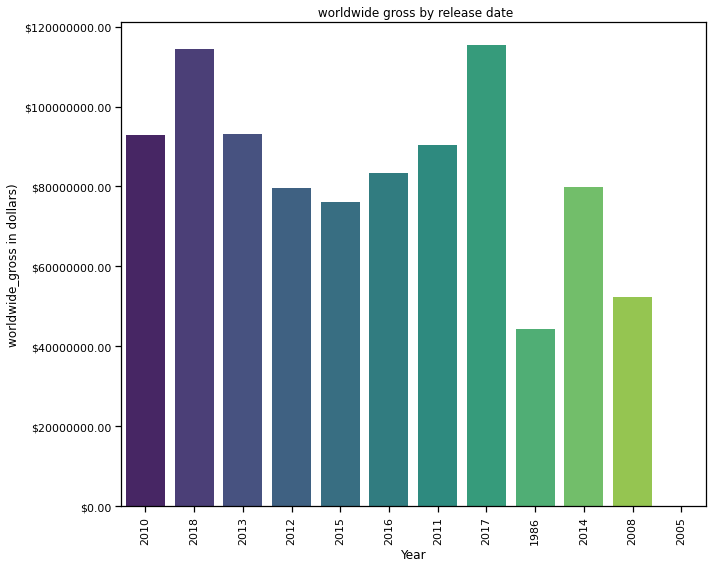

In [468]:

Releasedate_fig, final_movie_dataset_ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.barplot(ax= final_movie_dataset_ax, x='year', y='worldwide_gross', data= final_movie_dataset,ci = None,palette='viridis')
final_movie_dataset_ax.set_xlabel('Year')
final_movie_dataset_ax.set_ylabel('worldwide_gross in dollars)')
final_movie_dataset_ax.set_title(' worldwide gross by release date')
final_movie_dataset_ax.yaxis.set_major_formatter('${x:1.2f}')
final_movie_dataset_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/Releasedate.png', dpi=200)

plt.show()

We will use box plots to :
which release month leads to higher worldwide gross:

In [469]:
#release_month = final_movie_dataset.groupby('Month')[['worldwide_gross']].median().reset_index()
#release_month.head()

In [470]:
final_movie_dataset.sort_values(['worldwide_gross'], ascending = False)
release_month = final_movie_dataset.groupby(['Month'])['worldwide_gross'].mean()
release_month = release_month.reset_index()

release_month

,Month,worldwide_gross
0,Apr,5.212346e+07
1,Aug,6.775637e+07
2,Dec,1.050386e+08
3,Feb,9.262619e+07
4,Jan,5.958827e+07
5,Jul,1.255259e+08
6,Jun,1.244365e+08
7,Mar,6.601934e+07
8,May,1.083706e+08
9,Nov,1.415103e+08


In [471]:
#updating cell values to month names instead of numbers
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_nums = list(release_month['Month'])
months_dict = dict(zip(month_nums, month_names))
release_month['Month'] = release_month['Month'].map(months_dict)
release_month

,Month,worldwide_gross
0,Jan,5.212346e+07
1,Feb,6.775637e+07
2,Mar,1.050386e+08
3,Apr,9.262619e+07
4,May,5.958827e+07
5,Jun,1.255259e+08
6,Jul,1.244365e+08
7,Aug,6.601934e+07
8,Sep,1.083706e+08
9,Oct,1.415103e+08


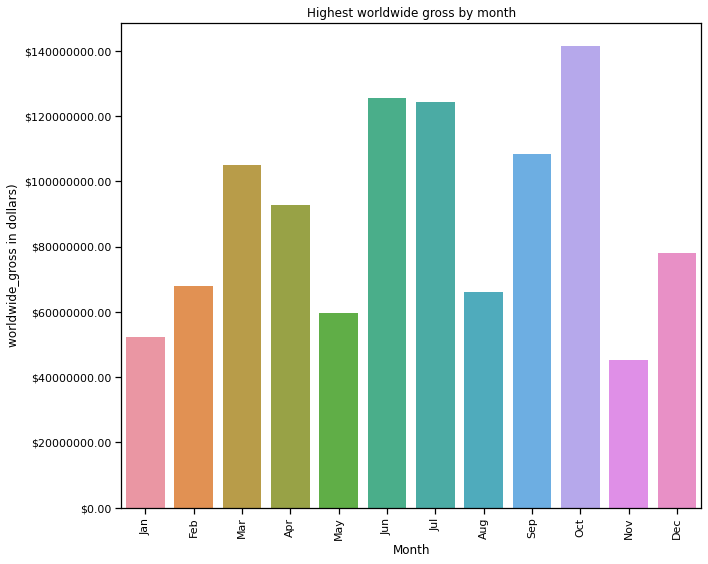

In [474]:
#Creatin plot to understand which month give's the highgest Gross earnings.
Release_month_fig, release_month_ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.barplot(ax= release_month_ax, x='Month', y='worldwide_gross', data= release_month,ci = None)
release_month_ax.set_xlabel('Month')
release_month_ax.set_ylabel('worldwide_gross in dollars)')
release_month_ax.set_title('Highest worldwide gross by month')
release_month_ax.yaxis.set_major_formatter('${x:1.2f}')
release_month_ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.savefig('Images/releasemonth_gross.png', dpi=200)

plt.show()

Which studio seems to be the most revenue :


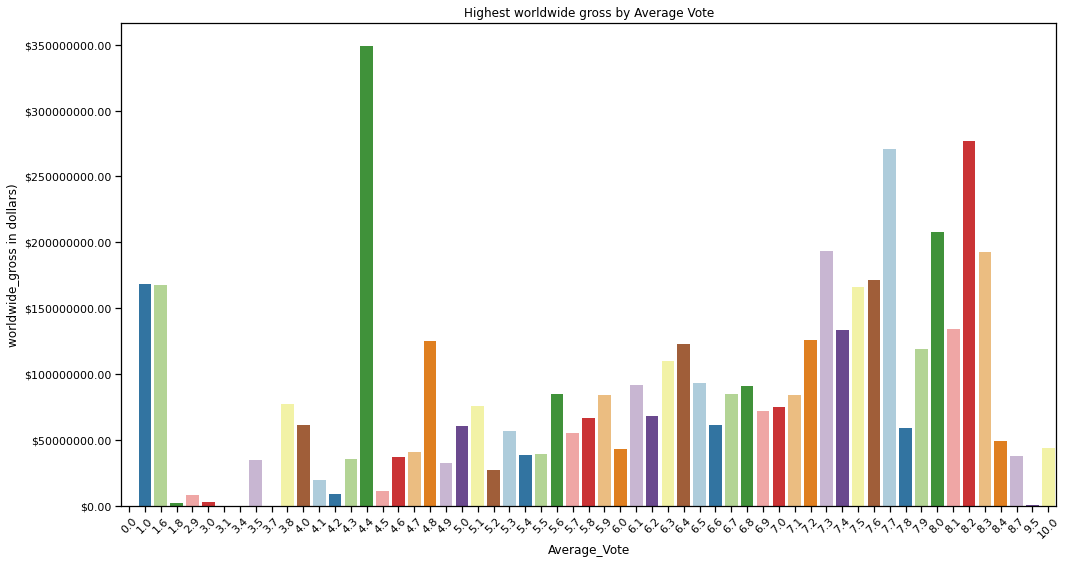

In [479]:
Release_month_fig, final_movie_dataset_ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

sns.barplot(ax= final_movie_dataset_ax, x='vote_average', y='worldwide_gross', data= final_movie_dataset,ci = None,palette='Paired')
final_movie_dataset_ax.set_xlabel('Average_Vote')
final_movie_dataset_ax.set_ylabel('worldwide_gross in dollars)')
final_movie_dataset_ax.set_title('Highest worldwide gross by Average Vote')
final_movie_dataset_ax.yaxis.set_major_formatter('${x:1.2f}')
final_movie_dataset_ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.savefig('Images/Average_vote.png', dpi=200)

plt.show()

In [ ]:
#Genre by popularity:
